In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest

# 2. Load dataset
df = pd.read_csv("ship_fuel_efficiency_numeric.csv")

# 3. Define features and target
X = df.drop(columns=["fuel_consumption"])
y = df["fuel_consumption"]

# 4. Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Model A - Original Data
model_orig = RandomForestRegressor(random_state=42)
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)

print("Model A (Original Dataset):")
print("R²:", r2_score(y_test_orig, y_pred_orig))
print("MAE:", mean_absolute_error(y_test_orig, y_pred_orig))
print("RMSE:", np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)))

# 6. Outlier removal with IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(y >= Q1 - 1.5 * IQR) & (y <= Q3 + 1.5 * IQR)]

# Redefine features and target after IQR
X_filt = df_filtered.drop(columns=["fuel_consumption"])
y_filt = df_filtered["fuel_consumption"]

# 7. Further outlier cleaning with Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
mask = iso.fit_predict(X_filt)
X_clean = X_filt[mask == 1]
y_clean = y_filt[mask == 1]

# 8. Train-test split on cleaned data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# 9. Model B - Cleaned Data
model_clean = RandomForestRegressor(random_state=42)
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)

print("\nModel B (Optimized Dataset):")
print("R²:", r2_score(y_test_clean, y_pred_clean))
print("MAE:", mean_absolute_error(y_test_clean, y_pred_clean))
print("RMSE:", np.sqrt(mean_squared_error(y_test_clean, y_pred_clean)))


Model A (Original Dataset):
R²: 0.9946187294435878
MAE: 222.3950760416663
RMSE: 380.5422500589818

Model B (Optimized Dataset):
R²: 0.9884544001088644
MAE: 128.03678215767636
RMSE: 164.52461165325207


Compared to the original regression model, the optimized model trained on the cleaned dataset achieved higher R² and lower MAE and RMSE, confirming that outlier removal improved model performance and robustness.

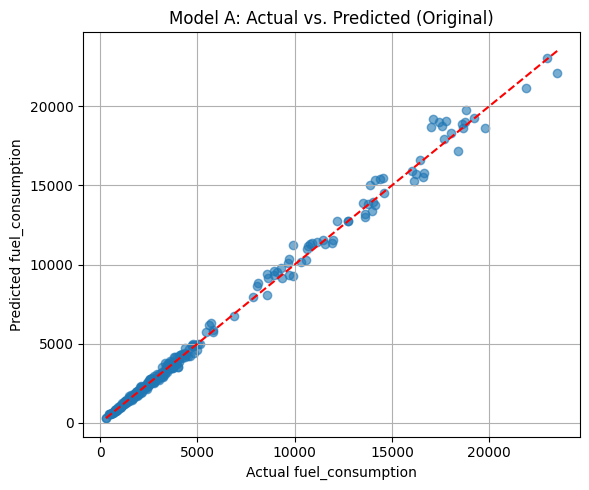

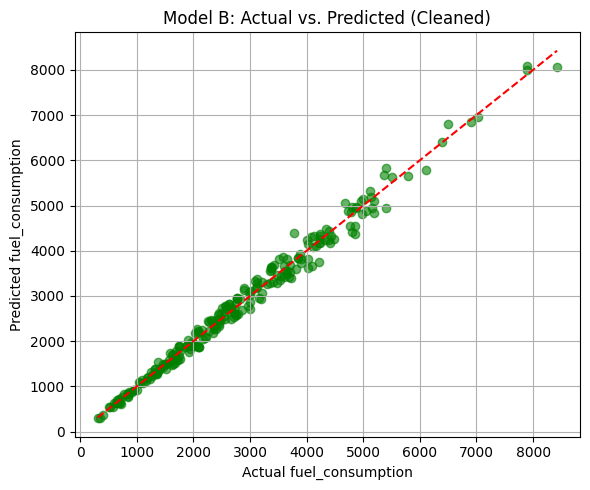

In [4]:
import matplotlib.pyplot as plt

# Plot for Model A - Original Dataset
plt.figure(figsize=(6, 5))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.6)
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.title("Model A: Actual vs. Predicted (Original)")
plt.xlabel("Actual fuel_consumption")
plt.ylabel("Predicted fuel_consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Model B - Cleaned Dataset
plt.figure(figsize=(6, 5))
plt.scatter(y_test_clean, y_pred_clean, alpha=0.6, color='green')
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.title("Model B: Actual vs. Predicted (Cleaned)")
plt.xlabel("Actual fuel_consumption")
plt.ylabel("Predicted fuel_consumption")
plt.grid(True)
plt.tight_layout()
plt.show()


The actual vs. predicted plots show that the optimized model produces predictions more tightly clustered around the ideal diagonal line, indicating improved accuracy and reduced error compared to the original model.